# 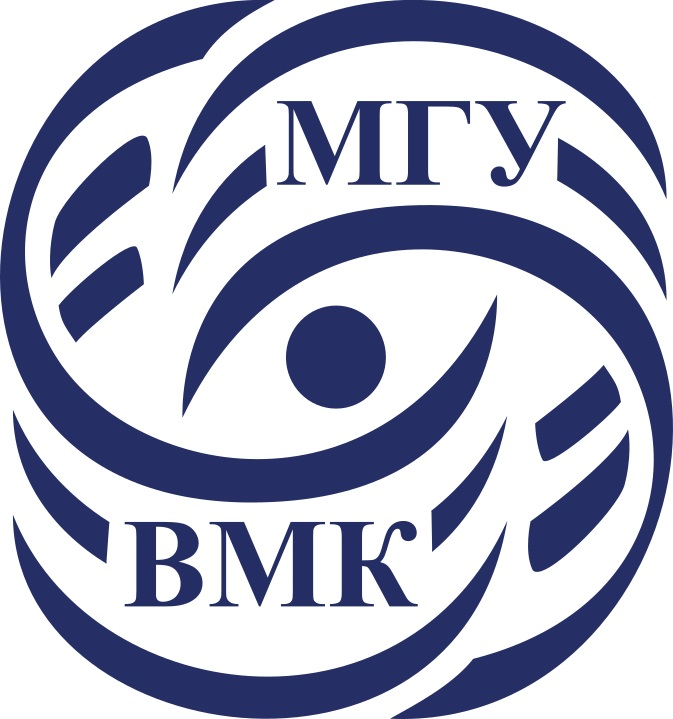

# Машинное обучение. ВМК МГУ

## Практическое задание 4: Линейные модели, часть 1: Регрессия

### Важно! О формате сдачи

* Все задания в этой части оцениваются по системе <font color='red'>кросс-рецензирования.</font>
* При решении ноутбука <font color='red'>используйте данный шаблон.</font> Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий. Добавлять свои ячейки, при необходимости, конечно можно
* Везде, где в формулировке задания есть <font color='red'>какой-либо вопрос (или просьба вывода)</font>, необходимо прописать ответ в ячейку (код или markdown).
* Наличие <font color='red'>кода решения обязательно.</font> Письменные ответы на вопросы без сопутствующего кода оцениваются в 0 баллов.
* Если в ячейке написана фраза <font color='red'>"Вывод"/"Ответ на вопрос" итд</font>, то ожидается ответ в виде текста (можете добавить ячейки с кодом, если считаете это необходимым, но это необязательно). Если в ячейке написано <font color='red'>"Your code here" и пр. </font>, то ожидается ответ в виде кода (можете добавить ячейки с кодом, если считаете это необходимым, но это необязательно). Если есть и ячейка с фразой "Вывод", и ячейка с фразой "Your code here", то в ответе ожидается и код, и текст

Цель данного задания:

* Узнать, что такое переобучение и как с ним бороться в линейных моделях;
* Понять, чем отличаются разные регуляризаторы;
* Научиться решать задачу регрессии линейными моделями.
-------
При выполнении данного задания необходимо последовательно запустить все ячейки ноутбука и ответить на $11$ вопросов. Ответы на вопросы будут проверены в рамках кросс-ревью. Всего за ответы на вопросы можно получить $20$ баллов.

### <font color=orange>*Примерное время выполнения (execution time/время выполнения, если нажать run all) всех ячеек ноутбука при правильной реализации: 30 минут </font>*

## Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий, **возможно,** нужно перезагрузить среду (runtime), но скорее всего вам это не понадобится


На скачивание файла и установку понадобится не более 5 минут.

**Важно!**
Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

**Важно!**
Если вы предпочитаете делать практические задания на своем личном ноутбуке, то проверьте, что вы установили рабочее окружение в [соответствии с гайдом](https://github.com/MSU-ML-COURSE/ML-COURSE-23-24/blob/main/tutorials/Туториал%20по%20установке%20рабочего%20окружения%20в%20Python%20для%20решения%20задач.pdf)


In [ ]:
# !!! Данный блок будет работать только в Google-Colab !!!
# Устанавливаем урезанную версию requeirements.txt для ускорения установки
# Если будут всплывать ошибки о несовместимости библиотек, то ничего страшного
# На это задание они не влияют

! gdown 1pIw8GdGKY6fZ_XNPc6snimdV6lbXJ199
! pip install -r /content/requirements_small.txt

Downloading...
From: https://drive.google.com/uc?id=1pIw8GdGKY6fZ_XNPc6snimdV6lbXJ199
To: /content/requirements_small.txt
100% 374/374 [00:00<00:00, 1.55MB/s]
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 83.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.2/324.2 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import catboost
assert(catboost.__version__ == '1.2.1')

Теперь можно приступать к выполнению задания! :)

-----------
<font color="white" style="opacity:0.2023"></font>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
sns.set(style="darkgrid")
%matplotlib inline

## Часть 1. Линейная регрессия

Напомним, что линейная регрессия — это модель следующего вида: $$a(x) = \langle w, x \rangle + b$$ где $w \in \mathbb{R}^d$, $b \in \mathbb{R}$. Обучить линейную регрессию — значит найти $w$ и $b$.

Для обучения линейной регрессии, равно как и для обучения остальных простых моделей (линейные модели, решающие деревья, knn и т.д.) отлично подходит библиотека scikit-learn (sklearn): в ней очень понятный и простой интерфейс.

Однако для обучения более сложных моделей вроде бустинга и нейронных сетей всё же нужно пользоваться специализированными библиотеками: XGBoost, LightGBM, CatBoost и пр. для градиентного бустинга над деревьями, PyTorch, Tensorflow и пр. для нейронных сетей.

Так как мы будем обучать линейную регрессию, нам подойдет реализация из sklearn. В sklearn есть несколько классов, реализующих линейную регрессию. Основные это:

- Ridge — линейная регрессия с оптимизацией MSE и $\ell_2$-регуляризацией
- Lasso — линейная регрессия с оптимизацией MSE и $\ell_1$-регуляризацией

Также есть SVR, ElasticNet  и пр., но не будем сегодня о них

У моделей из sklearn есть методы fit и predict. Первый принимает на вход обучающую выборку и вектор целевых переменных и обучает модель, второй, будучи вызванным после обучения модели, возвращает предсказание на выборке.

Рассмотрим, модельные данные для задачи регрессии. Пусть $x$ будет обычным числом из равномерного распределения, а $y = 0.5 \cdot x + 0.1$ &mdash; целевая переменная. При этом наблюдаем мы $\overline{y} = y + \varepsilon,~\varepsilon \sim \mathcal{N}(0, 0.01)$.

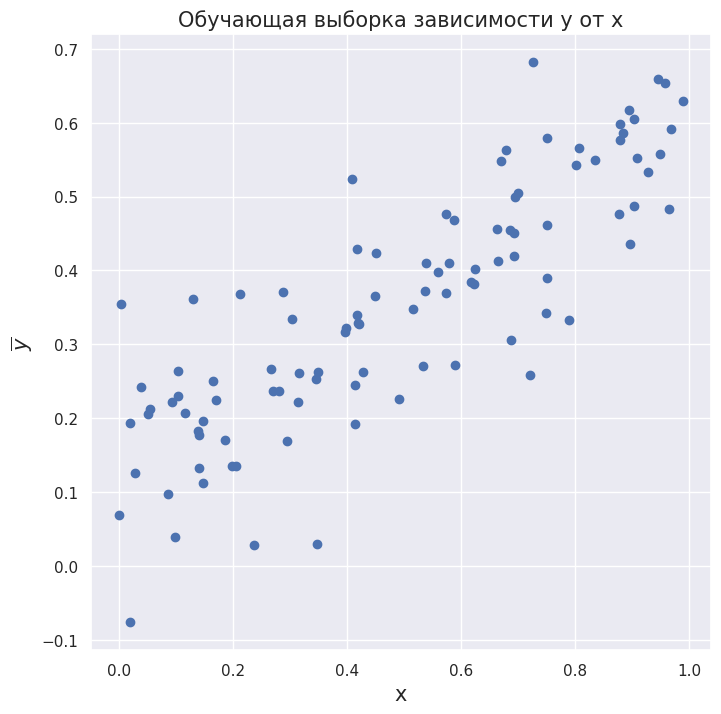

In [ ]:
np.random.seed(1)
X = np.random.uniform(0, 1, 100)
Y = X * 0.5 + 0.1 + np.random.randn(100) * 0.1

plt.figure(figsize=(8, 8))
plt.scatter(X, Y)
plt.title("Обучающая выборка зависимости y от x", size=15)
plt.xlabel("x", size=15)
plt.ylabel(r'$\overline{y}$', size=15)
plt.show()

Обучим линейную регрессию, и посмотрим как регуляризация влияет на качество модели. В реализации библиотеки sklearn коэффициент регуляризации задаётся параметром alpha

In [ ]:
from sklearn.linear_model import Ridge

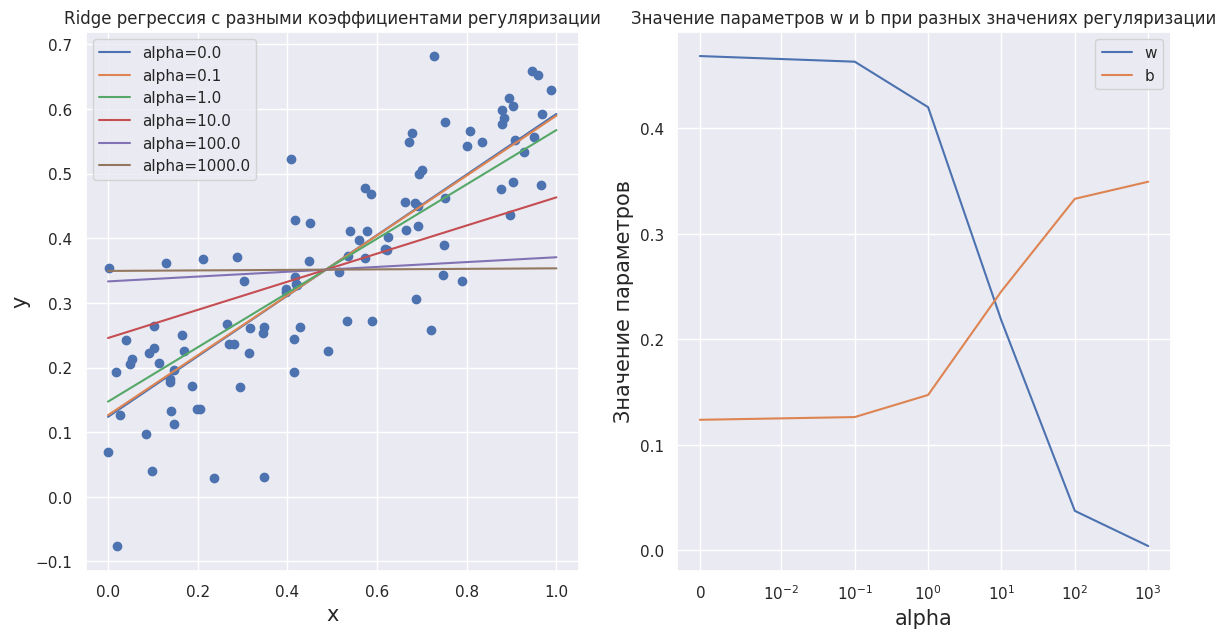

In [ ]:
x_axis = np.linspace(0, 1, 200)
fig, axs = plt.subplots(figsize=(14, 7), ncols=2)
axs[0].scatter(X, Y)

w = []
b = []

alphas = [0.0, 0.1, 1.0, 10.0, 100.0, 1000.0]

for alpha in alphas:
    reg = Ridge(alpha=alpha)
    reg.fit(X[:, None], Y)
    pred = reg.predict(x_axis[:, None])
    w.append(reg.coef_[0])
    b.append(reg.intercept_)
    axs[0].plot(x_axis, pred, label="alpha=" + str(alpha))

axs[0].legend()
axs[0].set_xlabel("x", size=15)
axs[0].set_ylabel("y", size=15)
axs[0].set_title("Ridge регрессия с разными коэффициентами регуляризации")
axs[1].plot(alphas, w, label="w")
axs[1].plot(alphas, b, label="b")
axs[1].set_xlabel("alpha", size=15)
axs[1].set_ylabel("Значение параметров", size=15)
axs[1].set_title("Значение параметров w и b при разных значениях регуляризации")
axs[1].set_xscale("symlog", linthresh=0.01)
axs[1].legend()
plt.show()

### **Вопрос 1** (1 балл)

Как зависят параметры модели от константы регуляризации? А качество?



**Ответ:** Между константой регуляризации и значением параметра $w$ обратная зависимость, т.е при увеличении константы регуляризации уменьшается значение $w$. Между константой регуляризации и значением параметра $b$ прямая зависимость, т.е при увеличении константы увеличивается значение $b$.

Увеличение константы регуляризации может уменьшить переобучение, что может привести к более стабильным и устойчивым прогнозам на новых данных. Однако, слишком высокие значения константы регуляризации могут привести к недообучению модели, где модель становится слишком простой и неспособной захватывать сложные закономерности в данных. К примеру, на графике видно , что при весьма больших $\alpha$ значения $y$ становятся константными, что не отображает реальную зависимость $y$ от $x$.

### **Вопрос 2** (1 балл)

Почему при обучении линейных моделей, коэффициент $b$ не регуляризуется? Дайте ответ с опорой на лекции и увиденные картинки.

***Ответ:*** В большинстве случаев, цель регуляризации - уменьшить влияние мультиколлинеарности и переобучения за счет уменьшения величины и вариации коэффициентов, связанных с независимыми переменными. Коэффициент $b$ - это просто сдвиг. Он не имеет отношения к этим проблемам, поскольку он не зависит от независимых переменных. Поэтому нет смысла его регуляризовать.


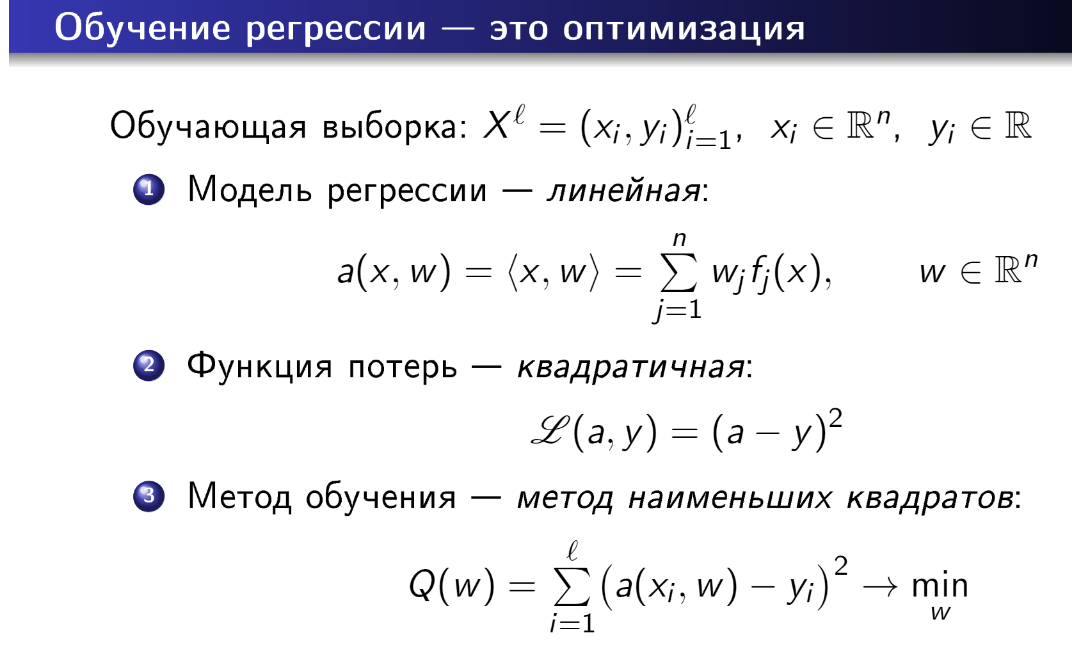

------

Казалось бы, зачем нам эта глупая регуляризация?!

Давайте рассмотрим ещё один модельный пример. Представим, что кто-то добавил в данные к переменной $x$ её же умноженную на $2$. То есть, теперь у нас два признака $x_1$ и $x_2 = 2 \cdot x_1$. Тогда, $y = c \cdot 0.5 \cdot x_1 + \frac{1 - c}{4} \cdot x_2 + 0.1$, где $c$ любое сколь угодно большое вещественное число. Это может привести к тому, что без регуляризации мы рискуем выучить очень большие веса!

In [ ]:
np.random.seed(1)
X2 = np.hstack((X[:, None], 2 * X[:, None]))
Y2 = X2[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

reg = Ridge(alpha=0.0)
reg.fit(X2, Y2)
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])

w1: 0.1006220738265918 	w2: 0.20124414765318363


Коэффициенты адекватные, хотя и не похожи на изначальную зависимость. Но что, если $x_2$ будет равняться $3 \cdot x_1$?

In [ ]:
np.random.seed(1)
X3 = np.hstack((X[:, None], 3 * X[:, None]))
Y3 = X3[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

reg = Ridge(alpha=0.0)
reg.fit(X3, Y3)
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])

w1: 20443435586638.348 	w2: -6814478528879.28


Тут вот уже не повезло. Коэффициенты случайно выучились неадекватно большими. Создадим обучающую выборку из того же распределения и посмотрим на качество

In [ ]:
np.random.seed(2)
X3_test = np.random.uniform(0, 1, 100)
X3_test = np.hstack((X3_test[:, None], 3 * X3_test[:, None]))
Y3_test = X3_test[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

Y3_test_pred = np.sum(reg.coef_[None] * X3_test + reg.intercept_, axis=1)
print("MSE loss: %.4f" % np.mean((Y3_test_pred - Y3_test) ** 2))

MSE loss: 0.0209


Вроде бы неплохое, но что если мы добавим ко второму признаку одного из объектов небольшой шум?

In [ ]:
X3_test[0, 1] = X3_test[0, 1] + 1e-10
Y3_test_pred_noisy = np.sum(reg.coef_[None] * X3_test + reg.intercept_, axis=1)
print("MSE loss:", np.mean((Y3_test_pred_noisy - Y3_test) ** 2))
print("Предсказание для первого объекта с шумом: ", Y3_test_pred_noisy[0])
print("Предсказание для первого объекта без шума: ", Y3_test_pred[0])

MSE loss: 4641.705892708396
Предсказание для первого объекта с шумом:  -681.02734375
Предсказание для первого объекта без шума:  0.419921875


Как видим, даже небольшое изменение в данных, приводит к резкому падению качества.

### **Вопрос 3** (2 балла)
Рассмотрите больше примеров с двумя признаками $x_1$ и $x_2$, где $x_2$ линейно зависит от $x_1$. Убедитесь, что линейная модель без регуляризации крайне неустойчива.

Пусть $x_2 = 7x_1$

In [ ]:
# Ваш ответ здесь
np.random.seed(7)
X4 = np.hstack((X[:, None], 7 * X[:, None]))
Y4 = X4[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

reg = Ridge(alpha=0.0)
reg.fit(X4, Y4)
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])

w1: 10843340187546.393 	w2: -1549048598220.8372


In [ ]:
Y4_pred = np.sum(reg.coef_[None] * X4 + reg.intercept_, axis=1)
X4[4, 1] = X4[4, 1] + 1e-10
Y4_pred_noisy = np.sum(reg.coef_[None] * X4 + reg.intercept_, axis=1)
print("MSE loss:", np.mean((Y4_pred_noisy - Y4) ** 2))
print("Предсказание для пятого объекта с шумом: ", Y4_pred_noisy[4])
print("Предсказание для пятого объекта без шума: ", Y4_pred[4])

MSE loss: 239.51587299149895
Предсказание для пятого объекта с шумом:  -154.663330078125
Предсказание для пятого объекта без шума:  0.241455078125


Как мы видим, значения весов и MSE-метрики получились крайне большими. Также видим, что небольшой шум весьма сильно повлиял на прогноз

Пусть теперь $x_2 = \frac{3}{2}x_1$

In [ ]:
np.random.seed(10)
X5 = np.hstack((X[:, None], 1.5* X[:, None]))
Y5 = X5[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

reg = Ridge(alpha=0.0)
reg.fit(X5, Y5)
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])

w1: 14043225338809.201 	w2: -9362150225872.482


In [ ]:
Y5_pred = np.sum(reg.coef_[None] * X5 + reg.intercept_, axis=1)
X5[1, 1] = X5[1, 1] + 1e-10
Y5_pred_noisy = np.sum(reg.coef_[None] * X5 + reg.intercept_, axis=1)
print("MSE loss:", np.mean((Y5_pred_noisy - Y5) ** 2))
print("Предсказание для второго объекта с шумом: ", Y5_pred_noisy[1])
print("Предсказание для второго объекта без шума: ", Y5_pred[1])

MSE loss: 8764.244407160131
Предсказание для второго объекта с шумом:  -935.642578125
Предсказание для второго объекта без шума:  0.57421875


-----

Теперь добавим регуляризацию и посмотрим, как меняется значения весов, в зависимости от значения коэффициента регуляризации.

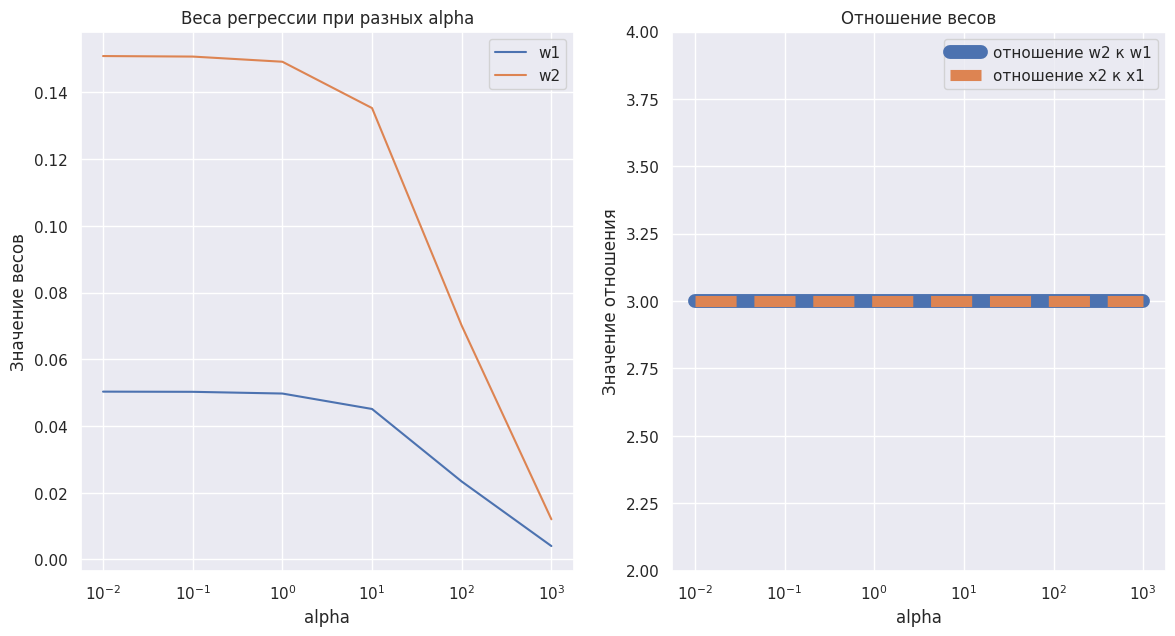

In [ ]:
w1 = []
w2 = []

alphas = [0.01, 0.1, 1, 10, 100, 1000]

for alpha in alphas:
    reg = Ridge(alpha=alpha)
    reg.fit(X3, Y3)
    w1.append(reg.coef_[0])
    w2.append(reg.coef_[1])

w1 = np.array(w1)
w2 = np.array(w2)

fig, axs = plt.subplots(figsize=(14, 7), ncols=2)
axs[0].plot(alphas, w1, label="w1")
axs[0].plot(alphas, w2, label="w2")
axs[0].set_xscale("log")
axs[0].set_title("Веса регрессии при разных alpha")
axs[0].set_xlabel("alpha")
axs[0].set_ylabel("Значение весов")
axs[0].legend()
axs[1].plot(alphas, w2 / w1, label="отношение w2 к w1", linewidth=10)
axs[1].plot([0.01, 1000], [3, 3], label="отношение x2 к x1", linestyle="--", linewidth=8)
axs[1].set_xscale("log")
axs[1].set_ylim(2,4)
axs[1].set_xlabel("alpha")
axs[1].set_ylabel("Значение отношения")
axs[1].set_title("Отношение весов")
axs[1].legend()
plt.show()

### **Вопрос 4** (2 балла)

Как думаете, почему отношение между весами постоянно? (подсказка, необходимо выписать функцию потерь и посчитать производные по весам)

**Ответ:**

$$Q(w, x)=(f(x, w)-y)^2+\alpha||w|| = (w_1x_1+w_2x_2+b-y)^2+\alpha(w_1^2+w_2^2)$$

$$\frac{\partial {Q}}{∂w_1} = 2x_1(w_1x_1+w_2x_2+b-y)+2\alpha w_1 = 0$$

$$\frac{\partial {Q}}{∂w_2} = 2x_2(w_1x_1+w_2x_2+b-y)+2\alpha w_2 = 0$$
$$x_1(w_1x_1+w_2x_2+b-y)= -\alpha w_1$$
$$x_2(w_1x_1+w_2x_2+b-y)= -\alpha w_2$$

$$\frac{x_2(w_1x_1+w_2x_2+b-y)}{x_1(w_1x_1+w_2x_2+b-y)}= \frac{-\alpha w_2}{-\alpha w_1}$$

$$\frac{x_2}{x_1} = \frac{w_2}{w_1}$$


Видим, что веса пропорциональны призракам, что видно и на графике. Так как отношение между признаками постоянно, то и отношение между весами постоянно

-----
<font color="white" style="opacity:0.2023"></font>

Заметим, что при $l_2$ регуляризации в данном примере веса получились пропорциональны значениям признаков. При этом, мы знаем, что оба признака взаимно однозначны, и прогноз можно делать только по одному из них. Для этого придумана $l_1$ регуляризация. В билиотеке sklearn линейная регрессия с $l_1$ регуляризацией реализована в классе Lasso

### **Вопрос 5** (2 балла)

Почему в нашем примере $l_1$ регуляризация приведёт к разреживанию весов? (подсказка, нужно опять подсчитать производную, но обратите внимание на дифференцируемость модуля).

**Ответ:**

$$Q(w, x)=(f(x, w)-y)^2+\alpha(|w_1|+|w_2|)=(w_1x_1+w_2x_2+b-y)^2+\alpha(|w_1|+|w_2|)$$

$$\frac{\partial {Q}}{∂w_1} = 2x_1(w_1x_1+w_2x_2+b-y)+\alpha sgn(w_1)$$

$$\frac{\partial {Q}}{∂w_2} = 2x_2(w_1x_1+w_2x_2+b-y)+\alpha sgn(w_2)$$


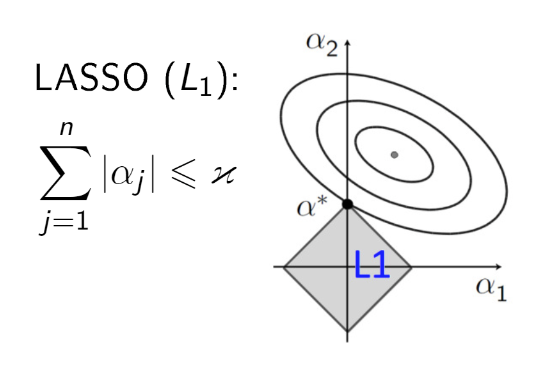

При дифференцируемости модуля возникают изломы, а как говорили на лекции, "любая норма с изломами приводит к отбору признаков"

-----

Добавим $l_1$ регуляризацию и посмотрим, как меняется значения весов, в зависимости от значения коэффициента регуляризации.

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
reg = Lasso(alpha=1., max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 1.")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.1, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.1")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.01, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.01")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.001, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.0001, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.0001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.00001, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.00001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

Веса, при alpha = 1.
w1: 0.0 	w2: 0.0

Веса, при alpha = 0.1
w1: 0.0 	w2: 0.03950662786303303

Веса, при alpha = 0.01
w1: 0.0 	w2: 0.15488377352619098

Веса, при alpha = 0.001
w1: 0.0 	w2: 0.1664214880925068

Веса, при alpha = 0.0001
w1: 0.0 	w2: 0.1675752595491384

Веса, при alpha = 0.00001
w1: 0.4261538129756522 	w2: 0.025639365702917725



### **Вопрос 6** (2 балла)

Почему в итоге при $\alpha = 0.00001$ получились веса не равные нулю?

**Подсказка** Обратите внимание на то, каким странным получился вес $w_2$

**Ответ:** При L1-регуляризации при увеличении $\alpha$ усиливается отбор признаков и некоторые веса зануляются. Но при очень маленьком значении $\alpha$ регуляризационный штраф становится небольшим, и модель имеет большее количество ненулевых весов

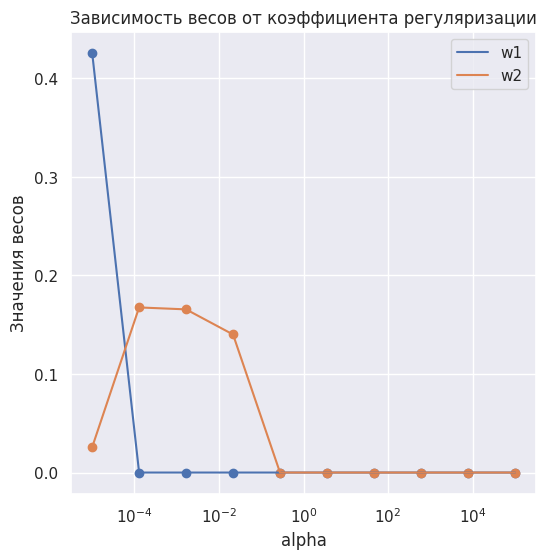

In [ ]:
#Ваш ответ здесь
alphas = np.logspace(-5, 5, 10)
w1 = []
w2 = []
for alpha in alphas:
  reg = Lasso(alpha=alpha, max_iter=1000, tol=1e-4)
  reg.fit(X3, Y3)
  w1.append(reg.coef_[0])
  w2.append(reg.coef_[1])

plt.figure(figsize=(6, 6))
plt.title('Зависимость весов от коэффициента регуляризации')
plt.xlabel('alpha')
plt.ylabel('Значения весов')
plt.xscale('log')
plt.scatter(alphas, w1)
plt.scatter(alphas, w2)
plt.plot(alphas, w1, label='w1')
plt.plot(alphas, w2, label='w2')
plt.legend()
plt.show()

На графике видно, что при весьма малых значениях $\alpha$ веса имеют ненулевые значения, а при больших $\alpha$ веса равны нулю

-----

В предущих блоках мы использовали модельные примеры, в которых $y$ зависел от $x$ линейно. Но так бывает далеко не всегда.

### **Вопрос 7** (2 балла)

 Придумайте, сгенерируйте и визуализируйте пример, в котором линейная регрессия будет плохо классифицировать данные.

Пусть $y=x^4-x^3+0.1$

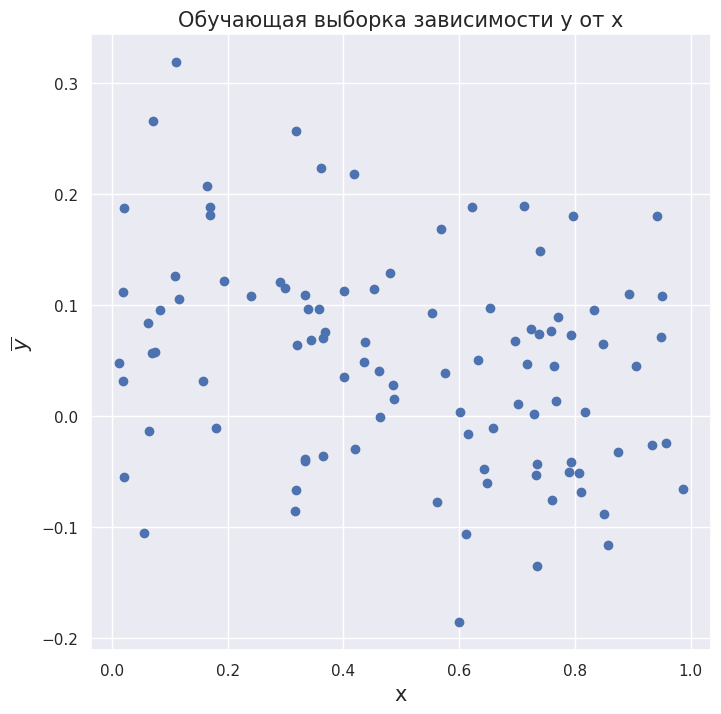

In [ ]:
#Ваш код здесь
np.random.seed(11)
X = np.random.uniform(0, 1, 100)
Y = X**4 - X**3 + 0.1 + np.random.randn(100) * 0.1
plt.figure(figsize=(8, 8))
plt.scatter(X, Y)
plt.title("Обучающая выборка зависимости y от x", size=15)
plt.xlabel("x", size=15)
plt.ylabel(r'$\overline{y}$', size=15)
plt.show()

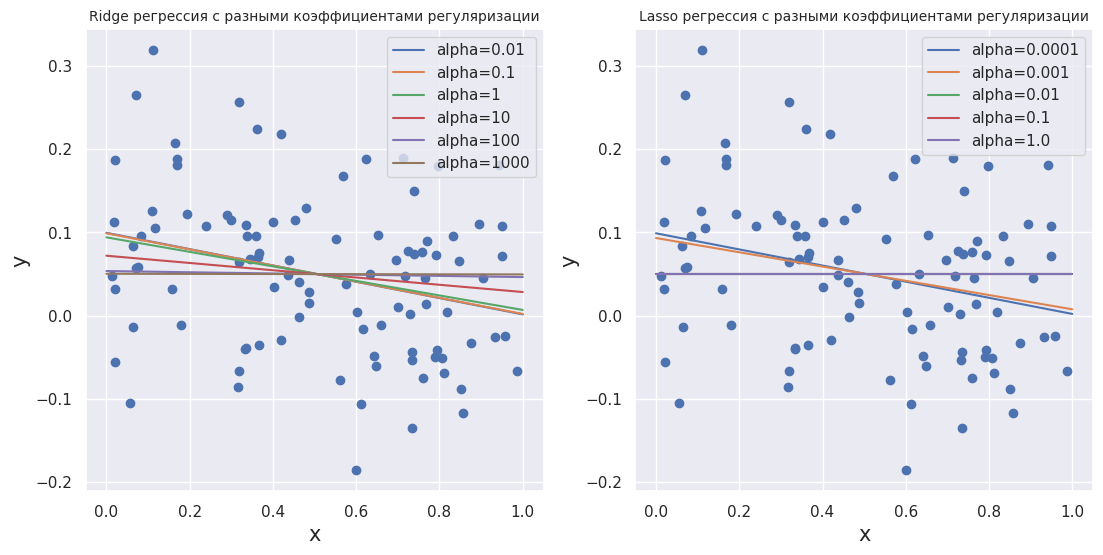

In [ ]:
x_axis = np.linspace(0, 1, 200)
fig, axs = plt.subplots(figsize=(13, 6), ncols=2)
axs[0].scatter(X, Y)
axs[1].scatter(X, Y)

ridge_alphas = [0.01, 0.1, 1, 10, 100, 1000]
lasso_alphas = [0.0001, 0.001, 0.01, 0.1, 1.]

for alpha in ridge_alphas:
  reg = Ridge(alpha=alpha)
  reg.fit(X[:, None], Y)
  pred = reg.predict(x_axis[:, None])
  axs[0].plot(x_axis, pred, label="alpha=" + str(alpha))

for alpha in lasso_alphas:
  reg = Lasso(alpha=alpha, max_iter=1000, tol=1e-4)
  reg.fit(X[:, None], Y)
  pred = reg.predict(x_axis[:, None])
  axs[1].plot(x_axis, pred, label="alpha=" + str(alpha))

axs[0].legend()
axs[0].set_xlabel("x", size=15)
axs[0].set_ylabel("y", size=15)
axs[0].set_title("Ridge регрессия с разными коэффициентами регуляризации", fontsize=10)
axs[1].set_title("Lasso регрессия с разными коэффициентами регуляризации", fontsize=10)
axs[1].set_xlabel("x", size=15)
axs[1].set_ylabel("y", size=15)
axs[1].legend()
plt.show()

Как видно на графике, линейная регрессия в данном примере плохо апроксимирует зависимость $y$ от $x$

-------------

Попробуем обучить линейную регрессию c $l_1$ регуляризацией на специальном датасете из sklearn

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

Взглянем немножко на данные. Выведем средние значения каждого признака

In [ ]:
with np.printoptions(formatter={'float': '{: 0.3f}'.format}):
  print(X_train.mean(axis=0))

[ 3.871  28.668  5.438  1.097  1423.264  3.116  35.621 -119.558]


Нетрудно видеть, что масштаб у разных признаков сильно отличается. Это может приводить к разным неприятным эффектам. Подробнее эту проблему мы разберём в следующем задании.

In [ ]:
from sklearn.preprocessing import StandardScaler

### **Вопрос 8** (2 балла)

Отмасштабируйте данные при помощи класса StandardScaler. Выведите средние значения и дисперсии признаков на обучающей и тестовой выборках.

**Замечание:** Результат положите в переменные X_train_scaled и X_test_scaled , чтобы последующий код был рабочим

In [ ]:
#Ваш ответ
scaler = StandardScaler()
scaler.fit(X_train, y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f'TrainSet mean = {X_train_scaled.mean()}')
print(f'TrainSet variance = {X_train_scaled.var()}')
print(f'TestSet mean = {X_test_scaled.mean()}')
print(f'TestSet variance = {X_test_scaled.var()}')

TrainSet mean = -3.7179561754888965e-16
TrainSet variance = 0.9999999999999978
TestSet mean = -0.00379663956478136
TestSet variance = 0.9517500036453815


Измерим качество прогнозатора. Будем использовать метрику RMSE.

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
reg = Lasso(alpha=0.5)
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.9780


### **Вопрос 9** (1 балл)

В чем плюсы RMSE по сравнению с MSE?

**Ответ:** RMSE имеет ту же размерность, что и целевая переменная (обычно в единицах измерения целевой переменной), в то время как MSE имеет размерность, возводимую в квадрат. Это делает RMSE более интерпретируемым, так как его значения прямо связаны с исходными единицами измерения. Например, если использовать RMSE для оценки модели предсказания цен на жилье, RMSE будет выражаться в тех же долларах, что и цены на жилье. Кроме того, RMSE легче интерпретировать, так как его значения близки к среднему квадратическому отклонению (стандартному отклонению) ошибок модели.

### **Вопрос 10** (1 балл)

Насколько удачно измерять качество модели с помощью RMSE с учетом того, что оптимизация линейной регрессии происходит по MSE?

**Ответ:** Измерение качества модели с использованием RMSE в контексте линейной регрессии, где оптимизация происходит по MSE, может быть удачным и информативным во многих случаях. RMSE - это квадратный корень из MSE. RMSE позволяет понять, насколько близки предсказания модели к фактическим данным в исходных единицах измерения. RMSE можно использовать для сравнения разных моделей или версий модели в терминах их способности предсказывать исходные единицы измерения целевой переменной. Это может быть важно, когда конечная цель - сделать практические выводы на основе предсказаний.

В общем, несмотря на то, что для оптимизации модели используется MSE,  RMSE может быть полезным инструментом для анализа и интерпретации результатов

-----

Проанализируем ошибку на обучающей выборке.

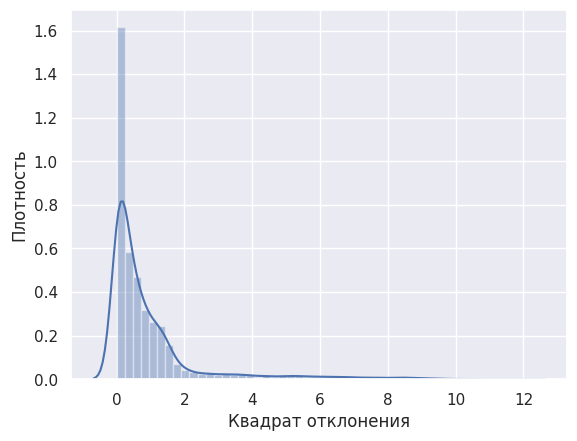

In [ ]:
error = (y_train - reg.predict(X_train_scaled)) ** 2
sns.distplot(error)
plt.xlabel("Квадрат отклонения")
plt.ylabel("Плотность")
plt.show()

Как видно, есть несколько объектов, на которых модель ошибается сильно. Давайте посмотрим на качество, если удалить эти объекты из обучающей выборки.

In [ ]:
mask = (error < np.quantile(error, 0.99))
reg.fit(X_train_scaled[mask], y_train[mask])
y_pred = reg.predict(X_test_scaled)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.9717


Таким образом, можно улучшить качество линейной регрессии, если удалить из обучающей выборки выбросы. В данном примере, качество улучшилось не так сильно, но бывают ситуации, когда чистка обучающей выборки по ошибке, приводит к сильному улучшению качества.

Обратим внимание на веса модели. Почти все из них занулились! Это большое преимущество, так как разреживание весов позволяет отбирать нужные признаки, делая модель более лёгкой.

In [ ]:
reg.coef_

array([ 0.30658523,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ])

А теперь обучим с $l_2$ регуляризацией.

In [ ]:
reg = Ridge(alpha=0.5)
reg.fit(X_train_scaled, y_train)
print(reg.coef_)

[ 0.82540051  0.12701227 -0.24066504  0.27101941 -0.00317096 -0.04117445
 -0.87312407 -0.84556157]


Как видим, веса не разрежены, хотя и есть очень маленькие значения

### **Вопрос 11** (2 балла)

Приведите пример, когда линейная регрессия с  регуляризацией гарантированно занулит какой-нибудь признак?

**Ответ:** Линейная регрессия с  $l_2$  регуляризацией гарантированно занулит какой-нибудь признак, когда этот признак равен нулю. Вес этого признака будет равен нулю независимо от коэффициента регуляризации. Также линейная регрессия с  $l_2$  регуляризацией гарантированно занулит все признаки, если все значения $y$ равны нулю

In [ ]:
# Пример 1. Пусть второй признак равен нулю
X = np.random.uniform(0, 1, 100)
X22 = np.hstack((X[:, None], 0 * X[:, None]))
Y22 = X22[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1
reg = Ridge(alpha=0.5)
reg.fit(X22, Y22)
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])

w1: 0.4348825153873798 	w2: 0.0


Видим, что $w_2$ равно нулю

In [ ]:
# Пример 2. Пусть все значения y равны 0
X = np.random.uniform(0, 1, 100)
X22 = np.hstack((X[:, None], 2 * X[:, None]))
Y22 = X22[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1
Y22 = 0 * Y22
reg = Ridge(alpha=0.5)
reg.fit(X22, Y22)
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])

w1: 0.0 	w2: 0.0


Видим, что оба веса равны нулю.

------

При обучении мы заранее не знаем, какое значение параметра регуляризации даст наилучшие результаты. Подобрать оптимальные параметры можно с помощью кросс-валидации. В sklearn есть несколько классов со встроенной кросс-валидацией

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

Воспользуемся классом GridSearch для перебора параметров по сетке.

* Для линейных регрессий перебирается параметр $\alpha$ - сила регуляризации. Обычно важнее перебирать порядок этого параметра, а не точное его значение. В силу этого сетку перебора будет удобно сделать через функцию np.logspace, например np.logspace(-3, 3, 10).

### Вопрос 12 (2 балла)

Воспользуйтесь классом [GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) и подберите константы регуляризации для Lasso и Ridge регрессий. Измерьте качество обученных моделей. Сетка перебора должна быть логарифмической, из хотя бы 10 значений


**Подсказка:**
* Пример, как можно перебирать параметры в GridSearch у вложенных [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline) можно [найти вот тут](https://www.kaggle.com/code/ilnazsalimov/gridsearch-with-pipeline)
* Обратите внимание, что сейчас мы сразу заносим масштабирование в Pipeline - чтобы иметь возможность сразу вызываться от оригинальных X_train, а также чтобы не было утечки данных при использовании GridSearch
* В GridSearch в качестве скоринговой функции можно подавать строковое описание функции из sklearn, которое [можно посмотреть вот тут](https://scikit-learn.org/stable/modules/model_evaluation.html), а также саму скоринговую функцию из sklearn или собственную функцию, сделанную [через make_scorer](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html#sklearn.metrics.make_scorer)

**Замечание:** Итоговое качество должно быть не больше 0.73 RMSE.

In [ ]:
model_lasso = Pipeline([
    ("scaler", StandardScaler()),
    ("regr", Lasso())
])

model_ridge = Pipeline([
    ("scaler", StandardScaler()),
    ("regr", Ridge())
])

grid_params = {
    'regr__alpha': np.logspace(-3, 3, 10)
}

lasso_cv = GridSearchCV(
    model_lasso,
    cv=5,
    scoring="neg_root_mean_squared_error",
    param_grid = grid_params
)

ridge_cv = GridSearchCV(
    model_ridge,
    cv=5,
    scoring="neg_root_mean_squared_error",
    param_grid = grid_params
)

# Your code: фитим модели и измеряем качество на тесте
# Можно вызывать predict прямо от обученных lasso_cv и ridge_cv
lasso_cv.fit(X_train, y_train)
lasso_pred = lasso_cv.predict(X_test)
print("Lasso: Test RMSE = %.4f" % mean_squared_error(y_test, lasso_pred, squared=False))

ridge_cv.fit(X_train, y_train)
ridge_pred = ridge_cv.predict(X_test)
print("Ridge: Test RMSE = %.4f" % mean_squared_error(y_test, ridge_pred, squared=False))

Lasso: Test RMSE = 0.7256
Ridge: Test RMSE = 0.7241


Убедимся, что Lasso всё ещё зануляет признаки (скорее всего модель Lasso занулила хотя бы один).

In [ ]:
lasso_cv.best_estimator_.named_steps["regr"].coef_

array([ 0.80235535,  0.13044694, -0.18274679,  0.21296615, -0.        ,
       -0.03656183, -0.82402123, -0.79344238])

Видим, что пятый признак равен нулю

**Выводы** В первой части задания по линейным моделям мы должны были узнать:
.

1.   Зачем нужна регуляризация.
2.   Как отбирать значащие признаки.
3.   Когда линейные модели работают хорошо, а когда плохо

-----
<font color="white" style="opacity:0.2023"></font>

Во **второй части** мы будем применять линейные модели для классификации реальных данных, где мы сможем проверить наши выводы, полученные на искуственных примерах. А также убедимся в полезности нормировки и научимся работать с разными видами данных.
